In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [2]:
# Load the ARFF file
data, meta = arff.loadarff('KDDTrain+.arff')

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# If you have byte-string columns, you can decode them:
for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode('utf-8')

In [3]:
# convert ceratin columns to numeric
df['is_host_login'] = pd.to_numeric(df['is_host_login'], errors='coerce')
df['is_guest_login'] = pd.to_numeric(df['is_guest_login'], errors='coerce')
df['logged_in'] = pd.to_numeric(df['logged_in'], errors='coerce')
df['land'] = pd.to_numeric(df['land'], errors='coerce')

# convert class column to numeric anamoly as 1 and normal as 0
df['class'] = df['class'].replace({
    'normal': 0,
    'anomaly': 1
})

/tmp/ipykernel_1469081/3749963743.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({


In [4]:
# remove columsn with only one unique value
df.drop(columns=["num_outbound_cmds"], inplace=True)

In [5]:
# Converting categorical columns to numeric using Label Encoding
le_p = LabelEncoder()
df['protocol_type'] = le_p.fit_transform(df['protocol_type'])
le_s = LabelEncoder()
df['service'] = le_s.fit_transform(df['service'])
le_f = LabelEncoder()
df['flag'] = le_f.fit_transform(df['flag'])

### Feature Selection

In [6]:
mutual_info = mutual_info_classif(df.drop(columns=['class']), df['class'])
print(mutual_info)

[0.0228897  0.05501424 0.47003852 0.36898714 0.5660183  0.4414672
 0.         0.00633159 0.         0.00613979 0.         0.29150454
 0.00530963 0.0007874  0.0013682  0.00265161 0.00202361 0.
 0.00083279 0.         0.00072345 0.26494739 0.06202305 0.27801629
 0.26833597 0.04251842 0.03620342 0.36828128 0.36023365 0.09876369
 0.14437186 0.33484123 0.31208882 0.2840295  0.1308242  0.18729881
 0.28717402 0.2820616  0.03852053 0.06243171]


In [7]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df.drop(columns=['class']).columns

<Axes: >

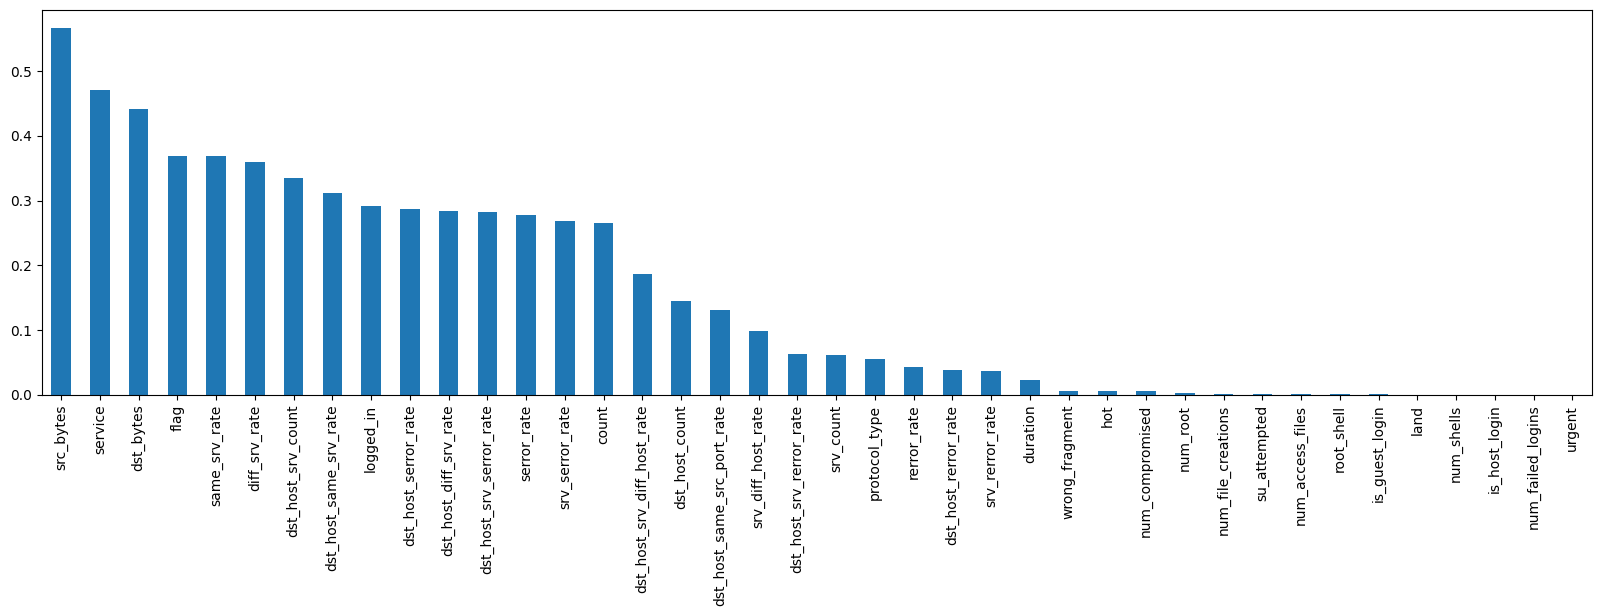

In [8]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5))

In [9]:
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(df.drop(columns=['class']), df['class'])

SelectKBest(k=30, score_func=<function mutual_info_classif at 0x72f24e8cf1a0>)

In [10]:
indexs = df.drop(columns=['class']).columns[Select_features.get_support()]
print(indexs)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'num_root', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')


In [11]:
df_train = df[indexs]
df_train['class'] = df['class']

# save the preprocessed data to a CSV file
df_train.to_csv('Train.csv', index=False)

/tmp/ipykernel_1469081/3826258262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['class'] = df['class']


## Preprocessing of Test Data

In [12]:
# Load the ARFF file
data, meta = arff.loadarff('KDDTest+.arff')

# Convert to a pandas DataFrame
df_test = pd.DataFrame(data)

# If you have byte-string columns, you can decode them:
for col in df_test.select_dtypes([object]):
    df_test[col] = df_test[col].str.decode('utf-8')

In [13]:
# convert ceratin columns to numeric
df_test['is_host_login'] = pd.to_numeric(df_test['is_host_login'], errors='coerce')
df_test['is_guest_login'] = pd.to_numeric(df_test['is_guest_login'], errors='coerce')
df_test['logged_in'] = pd.to_numeric(df_test['logged_in'], errors='coerce')
df_test['land'] = pd.to_numeric(df_test['land'], errors='coerce')

# convert class column to numeric anamoly as 1 and normal as 0
df_test['class'] = df_test['class'].replace({
    'normal': 0,
    'anomaly': 1
})

/tmp/ipykernel_1469081/1870728234.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['class'] = df_test['class'].replace({


In [14]:
df_test.drop(columns=['num_outbound_cmds'], inplace=True)

In [15]:
df_test['protocol_type'] = le_p.transform(df_test['protocol_type'])
df_test['service'] = le_s.transform(df_test['service'])
df_test['flag'] = le_f.transform(df_test['flag'])

df_test1 = df_test[indexs]
df_test1['class'] = df_test['class']


/tmp/ipykernel_1469081/3870788793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['class'] = df_test['class']


In [16]:
df_test1 = df_test1[df_train.columns]

In [17]:
df_test1.to_csv('Test.csv', index=False)